In [23]:
# %matplotlib inline

import numpy as np
import pandas as pd
import gensim
import utils
import re  
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.manifold import TSNE
# from utils import word_vector
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing

random_state=2022

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

In [26]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')  

1
1


## CBOW

In [27]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_caption = gensim.models.Word2Vec(tokenized_caption,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_caption.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_CBOW_Captions.model")


(22080377, 23299480)

In [28]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [29]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,model_w2v_caption)
w2v_df_caption = pd.DataFrame(wordvec_arrays)
w2v_df_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

### EmojiText

In [30]:
tokenized_emojiText = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_emojiText = gensim.models.Word2Vec(tokenized_emojiText,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_emojiText.train(tokenized_emojiText, total_examples= len(df['emoji_text']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(2698107, 3976140)

In [31]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,model_w2v_emojiText)
w2v_df_emojiText = pd.DataFrame(wordvec_arrays)
w2v_df_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

## hashtags

In [32]:
tokenized_hashtags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_hashtags = gensim.models.Word2Vec(tokenized_hashtags,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_hashtags.train(tokenized_hashtags, total_examples= len(df['hashtags']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(5333307, 6208540)

In [33]:
wordvec_arrays = np.zeros((len(tokenized_hashtags), 100)) 
for i in range(len(tokenized_hashtags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hashtags[i], 100,model_w2v_hashtags)
w2v_df_hashtags = pd.DataFrame(wordvec_arrays)
w2v_df_hashtags.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

## mentions

In [34]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_mentions = gensim.models.Word2Vec(tokenized_mentions,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_mentions.train(tokenized_mentions, total_examples= len(df['mentions']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(292009, 1015580)

In [35]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,model_w2v_mentions)
w2v_df_mentions = pd.DataFrame(wordvec_arrays)
w2v_df_mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

In [36]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_caption,w2v_df_hashtags,w2v_df_emojiText,w2v_df_mentions, df)))

In [37]:
w2v_Df

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,1.119175,-0.4513,-0.179345,0.546634,-0.283762,-0.191119,0.253844,1.025041,-0.020087,0.163896,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,0.1553,-0.352952,0.010162,0.087041,-0.714441,-0.354219,0.168508,1.165629,-0.119083,0.415797,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333
2,-0.122839,-0.103168,1.087256,-0.595767,0.186225,0.059405,-0.445401,-0.371999,0.040332,-0.146337,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,425,17663.68
3,0.039639,0.185848,1.306374,-1.08189,-0.098262,0.072153,-0.389607,0.257343,0.694262,-0.285172,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,490,16841.857143
4,-0.188289,0.39035,0.97112,-0.201297,-0.093371,0.374812,-0.626742,0.598407,0.262627,-0.374135,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.285592,-0.663018,0.374729,0.192126,-0.834724,-0.588295,0.161491,0.770728,-0.274534,0.111711,...,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0,878,153640.333333
41737,0.234115,-0.588229,0.59489,-0.358187,-0.933005,-0.296944,0.107461,0.164154,-0.148961,0.003647,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.428571
41738,0.296336,-0.930415,0.285389,-0.444643,-0.360712,-0.426492,0.31071,0.339807,-0.585369,-0.412176,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0,479,102699.125
41739,0.254448,-0.285364,0.864546,-0.012168,-0.691198,-0.078191,0.284217,0.422819,-0.484991,0.028285,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0,643,70165.571429


In [38]:
print(len(w2v_Df.columns))
a=len(w2v_Df.columns)-25+1
print(a)
w2v_Df[len(w2v_Df.columns)-28+1]
w2v_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(w2v_Df)

428
404
Couldn't covert 402 to float
Couldn't covert 419 to float
Couldn't covert 421 to float
Couldn't covert 423 to float
Couldn't covert 424 to float


In [39]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [40]:
dropped = [106,108,109,111,112,113]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,420,422,425,426,427
0,0.623729,0.480469,0.447693,0.453760,0.457049,0.506219,0.501794,0.539303,0.521599,0.498770,...,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.192308,0.390632,0.005571
1,0.557785,0.491320,0.467374,0.410799,0.414142,0.487894,0.492373,0.554028,0.508275,0.532043,...,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.038462,0.325148,0.008959
2,0.538757,0.518879,0.579232,0.346972,0.503872,0.534368,0.424597,0.392979,0.529731,0.457792,...,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.000000,0.192815,0.030561
3,0.549872,0.550766,0.601987,0.301531,0.475530,0.535800,0.430756,0.458895,0.617744,0.439453,...,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.000000,0.222374,0.029139
4,0.534279,0.573329,0.567171,0.383846,0.476017,0.569806,0.404576,0.494618,0.559650,0.427702,...,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.000000,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.566699,0.457110,0.505235,0.420622,0.402159,0.461593,0.491598,0.512667,0.487352,0.491877,...,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.000000,0.398818,0.265825
41737,0.563177,0.465362,0.528099,0.369180,0.392368,0.494329,0.485633,0.449135,0.504253,0.477603,...,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.019231,0.241473,0.141381
41738,0.567434,0.427609,0.495956,0.361099,0.449383,0.479773,0.508072,0.467533,0.445516,0.422677,...,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.000000,0.217372,0.177688
41739,0.564569,0.498777,0.556103,0.401525,0.416458,0.518908,0.505147,0.476227,0.459027,0.480857,...,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.000000,0.291951,0.121399


In [41]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [42]:
x_train_w2v_df, x_test_w2v_df, y_train_w2v_df, y_test_w2v_df = train_test_split(X, y, test_size=0.2)

## XGboost 

In [43]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_w2v_df, y_train_w2v_df)
y_pred = xg_reg.predict(x_test_w2v_df)

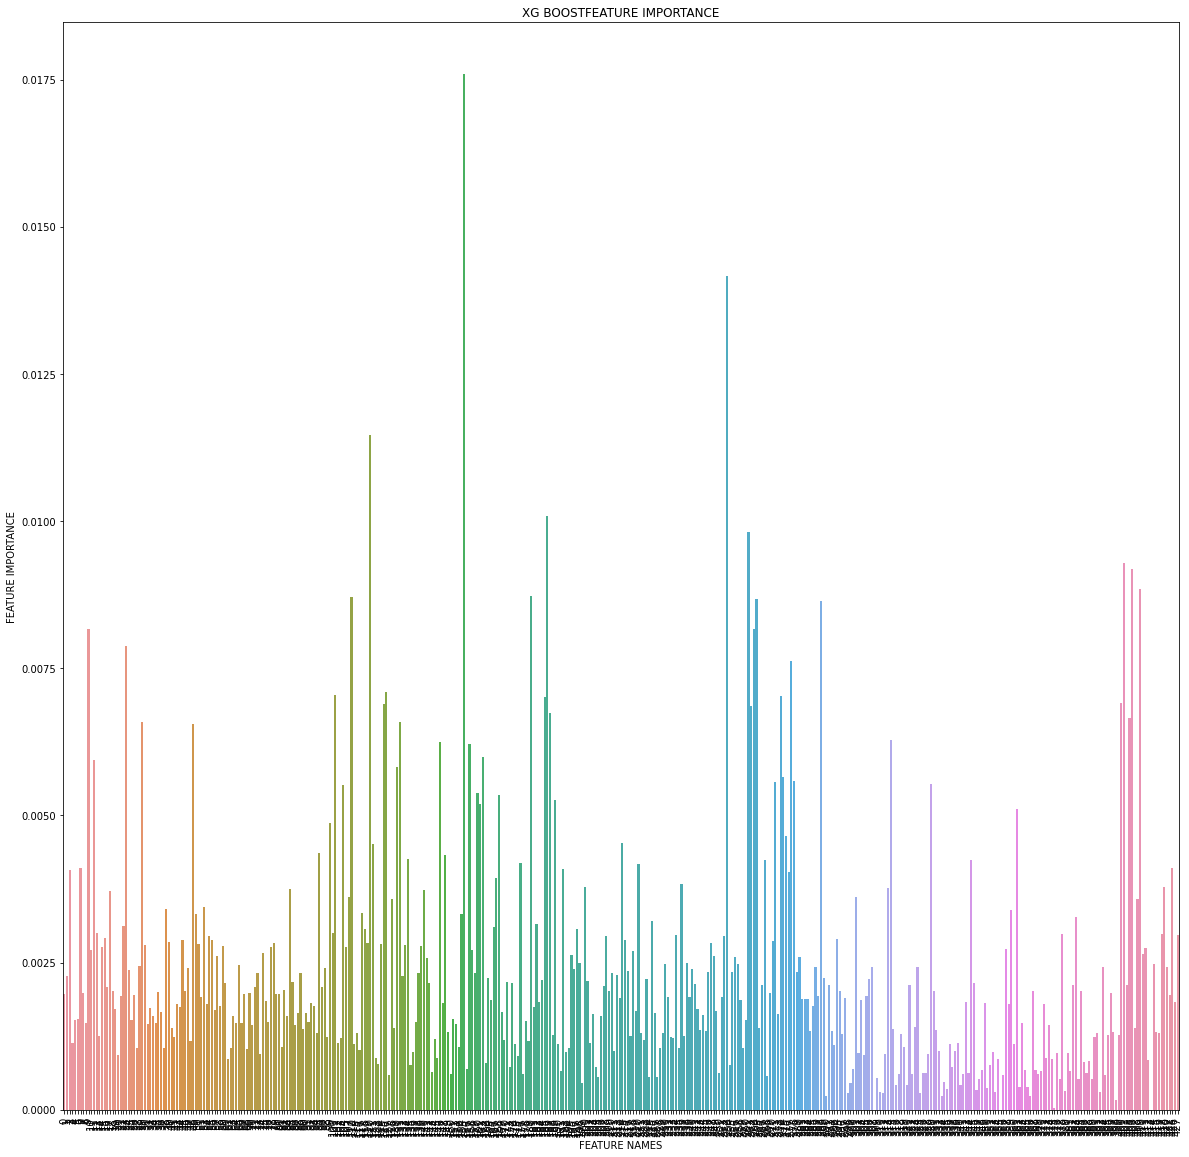

In [45]:
plot_feature_importance(xg_reg.feature_importances_,x_train_w2v_df.columns,'XG BOOST')

In [46]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00197
Feature: 1, Score: 0.00227
Feature: 2, Score: 0.00407
Feature: 3, Score: 0.00113
Feature: 4, Score: 0.00153
Feature: 5, Score: 0.00155
Feature: 6, Score: 0.00411
Feature: 7, Score: 0.00198
Feature: 8, Score: 0.00147
Feature: 9, Score: 0.00817
Feature: 10, Score: 0.00272
Feature: 11, Score: 0.00594
Feature: 12, Score: 0.00300
Feature: 13, Score: 0.00126
Feature: 14, Score: 0.00277
Feature: 15, Score: 0.00292
Feature: 16, Score: 0.00208
Feature: 17, Score: 0.00372
Feature: 18, Score: 0.00201
Feature: 19, Score: 0.00171
Feature: 20, Score: 0.00093
Feature: 21, Score: 0.00193
Feature: 22, Score: 0.00312
Feature: 23, Score: 0.00788
Feature: 24, Score: 0.00238
Feature: 25, Score: 0.00153
Feature: 26, Score: 0.00194
Feature: 27, Score: 0.00105
Feature: 28, Score: 0.00244
Feature: 29, Score: 0.00658
Feature: 30, Score: 0.00280
Feature: 31, Score: 0.00146
Feature: 32, Score: 0.00172
Feature: 33, Score: 0.00159
Feature: 34, Score: 0.00148
Feature: 35, Score: 0.00201
Fe

In [47]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## Random Forest

In [48]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_rnd = rnd_clf.predict(x_test_w2v_df)

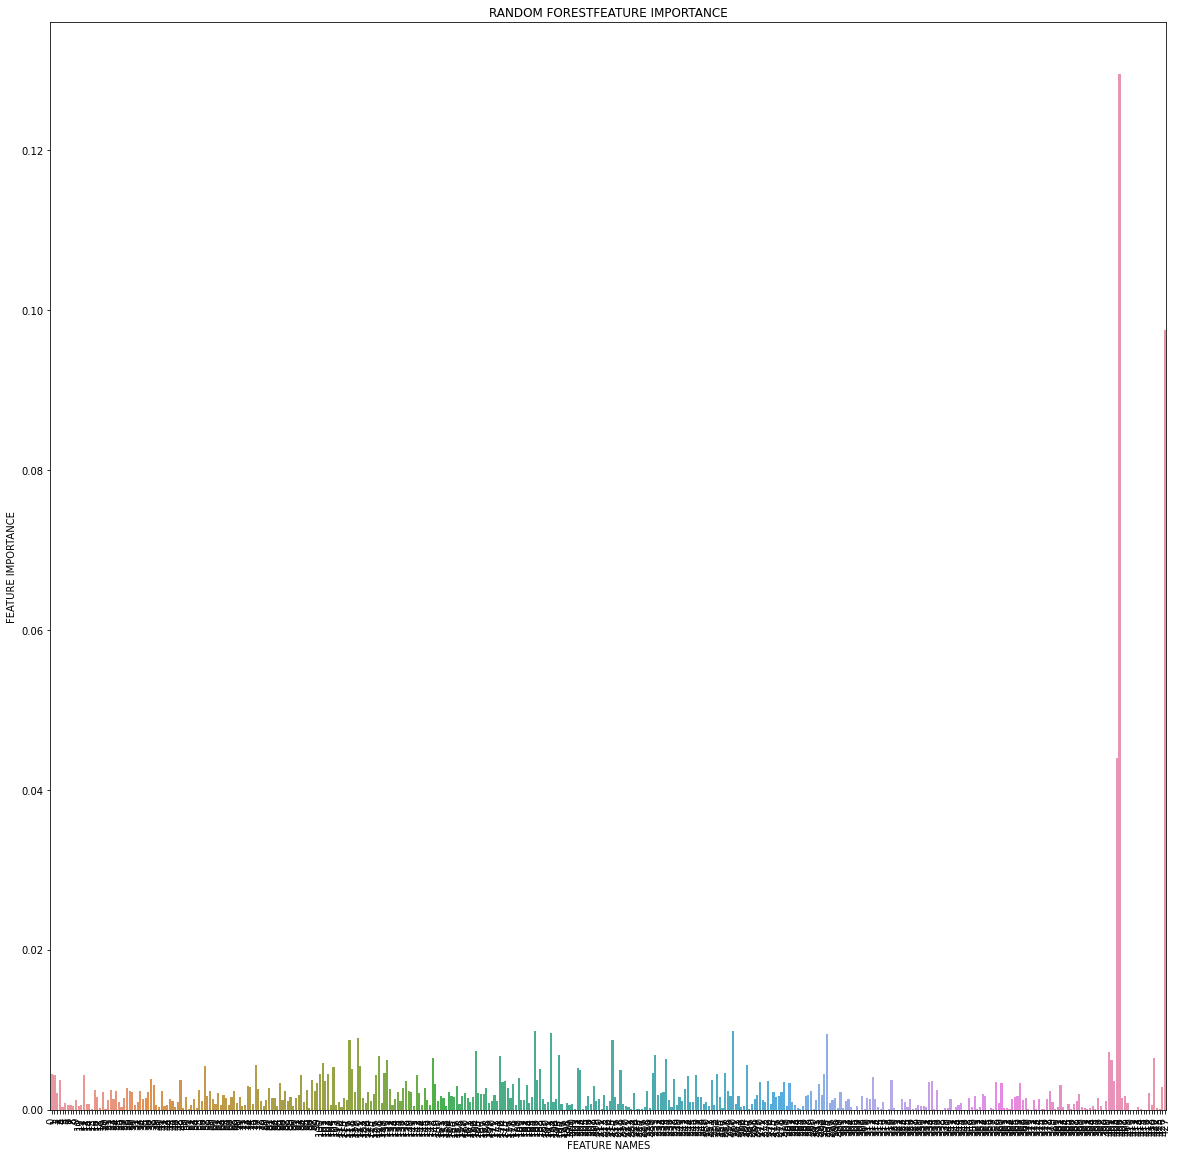

In [49]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_w2v_df.columns,'RANDOM FOREST')

In [50]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## MLP

In [51]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_mlp = mlp_GS.predict(x_test_w2v_df)

In [52]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## SVC

In [53]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_SVR = svr.predict(x_test_w2v_df)

In [54]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [55]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,XGboost,0.026896,0.584840,0.008474,-3.615786,0.641382
1,Random Forest,0.033368,0.360995,0.011773,-3.400162,0.677737
2,MLP,0.031749,0.421503,0.012468,-3.449902,0.597324
3,SVR,0.043997,-0.110950,0.013904,-3.123633,0.812749
